# The Harmonic Oscillator
## Using the Runge-Kutta Fourth Order Method

### The Theory

The theoretical approach is the same as with Euler's method, but is listed here so that the reader need not switch to a different file.

In this project, we simulate the damped and driven harmonic oscillator by means of Euler's method. The differential equation describing the harmonic oscillator of mass $m$ can be derived from Newton's second law,

$ \sum F = m\ddot{x} $.

There are three forces acting on the mass are: <br>
$F_s = -kx$ (the force of the spring is proportional to the diplacement and opposite in direction) <br>
$F_d = -\beta \dot{x}$ (the damping force is proportional to the speed and opposite in direction) <br>
$F = F(t)$ (the driving force is some function of time)

Here, $k$ is the spring constant in units of $[N/m]$, $\beta$ is the damping constant in units of $[N/ms^{-1}]$ and $F(t)$ has units of $[N]$. Plugging these forces into Newton's second law yields

$F(t) - kx - \beta\dot{x} = m\ddot{x}$.

It is often more convenient to move all terms involving $x$ and its derivatives to the left hand side (LHS) and the rest to the right hand side (RHS), giving

$m\ddot{x} + \beta\dot{x} + kx = F(t)$.

It is usually simpler to divide by $m$ to simplify the expression;

$\ddot{x} + \beta/m \dot{x} + k/m x = F(t)/m $.

To simplify further, the following substitutions are performed: <br>
$\beta/m = 2\gamma$ (the factor of 2 simplifies the solution of the DE) <br>
$k/m = \omega_0^2$ (the eigenfrequency of the oscillator) <br>
$F(t)/m = A(t)$ <br>

The resulting DE is

$\ddot{x} + 2\gamma\dot{x} + \omega_0^2 x = A(t) $.

This differential equation can be solved if $F(t)$ and thus $A(t)$ is known.

### The Runge-Kutta Fourth Order Method

For a differential equation of the form

\dot{y}(t) = f(y(t), t)

the Runge-Kutta fourth order method (RK4 from now on) may be applied. This method states that

$y(t + \Delta t) = y(t) + \frac{\Delta t}{6}\left(k_1 + 2k_2 + 2k_3 + k+4\right)$.

In this expression, the $k_i$ are defined by

$k_1 = f(y(t),\ t)$ <br>
$k_2 = f(y(t) + k_1\frac{\Delta t}{2},\ t + \frac{\Delta t}{2})$ <br>
$k_3 = f(y(t) + k_2\frac{\Delta t}{2},\ t + \frac{\Delta t}{2})$ <br>
$k_2 = f(y(t) + k_3\Delta t,\ t + \Delta t)$

In this case, both $y$ and $f$ are scalar functions. However, this method may also be applied to vectors. This will be done in the following section.

### The State Vector
In this approach, the so-called state vector $Y$ will be employed. The state vector is a vector in phase space that is defined as:

$Y(t) = \begin{bmatrix}
            x(t) \\
            v(t)
        \end{bmatrix}$.
        
The rate of change of $Y(t)$, $\dot{Y}(t)$ is

$\dot{Y}(t) = \begin{bmatrix}
            \dot{x}(t) \\
            \dot{v}(t)
        \end{bmatrix}$.

Here, $\dot{x}(t)$ simply equals $v$. The expression for $\dot{v}(t)$ is

$\dot{v}(t) = \ddot{x}(t) = A(t) - 2\gamma\dot{x}(t) - \omega_0^2 x(t)$.

In this way, the rate of change of the state vector becomes

$\dot{Y}(t) = \begin{bmatrix}
            v(t) \\
            A(t) - 2\gamma\dot{x}(t) - \omega_0^2 x(t)
        \end{bmatrix}$.
        
It can be seen that $\dot{Y}(t)$ depends on $t$ through $A(t)$ and on $Y(t)$ through $x(t)$ and $v(t)$. Thus

$\dot{Y}(t) = f(Y(t),\ t)$.

This allows for the use of the RK4. Applying the RK4 to this differential equation, we arrive at

$Y(t + \Delta t) = Y(t) + \frac{\Delta t}{6}\left(k_1 + 2k_2 + 2k_3 + k+4\right)$.

The $k_i$ are defined by

$k_1 = f(Y(t),\ t)$ <br>
$k_2 = f(Y(t) + k_1\frac{\Delta t}{2},\ t + \frac{\Delta t}{2})$ <br>
$k_3 = f(Y(t) + k_2\frac{\Delta t}{2},\ t + \frac{\Delta t}{2})$ <br>
$k_2 = f(Y(t) + k_3\Delta t,\ t + \Delta t)$

Note that both $f(Y(t),\ t)$ and $k_i$ are now no longer scalars, but vectors with two elements.

### Packages

Before the simulation starts, we need to include various packages.

In [16]:
import matplotlib.pyplot as plt     # for plotting
import math                         # for pi etc.
import numpy as np                  # for numpy

### Parameters

Below is a list of the parameters used in this simulation. A sinusoidal driving force is assumed, with amplitude $F_0$ and frequency $\omega_d$. In this simulation, $\omega_d$ is chosen to be equal to$\omega$, where $\omega$ is the eigenfrequency of the oscillator.

In [17]:
mass = 2                            # [kg] mass of the oscillator, m > 0
k = 3                               # [N/m] spring constant of oscillator, k > 0
d = 0.10                            # [Ns/m] damping constant of oscillator
omega2 = k/mass                     # [1/s²] eigenfrequency of oscillator squared
omega = pow(omega2, 1/2)            # [1/s] eigenfrequency of oscillator
omegad = omega                      # [1/s] driving frequency
F0 = 5                              # [N] driving amplitude
phase = math.pi/2                   # [rad] phase of driving force

### Simulation Parameters

As well as the physical parameters given above, some parameters regarding the simulation are needed. These are given below. In this list, $N_{freq}$ is the number of time steps per oscillation and $N_{osc}$ is the number of oscillations. It is convenient to separate these parameters, as it makes rescaling the simulation straightforward. The total number of time steps is $N_t$ and it is given by $N_{freq} \cdot N_{osc}$. The time step $dt$ is chosen to be the oscillation period divided by $N_{freq}$. The square of the time step recurs often and is therefore calculated in advance and defined as $dt2$. Lastly, the reduced driving amplitude, $A_0$ is defined as $F_0\cdot (\Delta t)^2/m$.

In [18]:
Nfreq = 50                          # [] number of timesteps per oscillation
Nosc = 30                           # [] number of oscillations to simulate
Nt = Nfreq * Nosc                   # [] number of time steps in total

dt = 2*math.pi / (Nfreq * omega)    # [s] timestep of simulation
dt2 = pow(dt, 2)                    # [s²] timestep squared

A0 = F0*dt2/mass                    # [m] reduced driving amplitude

### Initial Conditions

The initial conditions are specified as $x_i$ and $v_i$, the initial position and velocity respectively.

In [19]:
xi = 1                              # [m] initial displacement
vi = 0                              # [m/s] initial speed

### Arrays

The relevant arrays are specified below. The position array for any time is X and is empty initially. The time array T is immediately filled with all time values. Then the two initial conditions are applied by appending $x_i$ and $x_i + v_i\cdot \Delta t$ respectively.

In [20]:
Y = np.array([[0.]*Nt, [0.]*Nt])    # [m, m/s] state vector
Y[0,0] = xi                         # [m] insert initial position
Y[0,1] = vi                         # [m/s] insert initial speed

T = [jj*dt for jj in range(0, Nt)]  # [s] time list

### Functions

To make the calculation of the $k_i$ more clear, the $k_i$ are expressed as functions. These functions call functions of $\dot{x}$ and $\dot{v}$, in this code written as $f1(t, x, v)$ and $f(t, x, v)$ respectively. The output of these functions become the elements of the $k_i$, which are vectors.

In [21]:
def f1(t, x, v):                    # speed function defined as dx/dt = v = f1(t, x, v)
    return v

def f2(t, x, v):                    # acceleration function defined as dv/dt = -omega2*x - d*v + A0*math.cos(omegad*t) = f1(t, x, v)
    return -omega2*x - d*v + A0*math.cos(omegad*t + phase)

def kvector(t, x, v):               # k-vector function, returning a vector with f1 and f2
    kx = f1(t, x, v)
    kv = f2(t, x, v)

    ktot = np.array([kx, kv])

    return ktot

### Loop

The for-loop is implemented by repeatedly plugging in the equation for $x(t + \Delta t)$. The value of $x(t + \Delta t)$ is appended to the X-array.

In [22]:
for ii in range(0, Nt-1):
    k1 = kvector(T[ii],        Y[0, ii],              Y[1, ii])
    k2 = kvector(T[ii] + dt/2, Y[0, ii] + dt*k1[0]/2, Y[1, ii] + dt*k1[1]/2)
    k3 = kvector(T[ii] + dt/2, Y[0, ii] + dt*k2[0]/2, Y[1, ii] + dt*k2[1]/2)
    k4 = kvector(T[ii] + dt,   Y[0, ii] + dt*k3[0],   Y[1, ii] + dt*k3[1])

    Y[:, ii + 1] = Y[:, ii] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

### Plotting

Below is the fragment of code that plots $x$ against $t$. And the result is given below the code fragment.

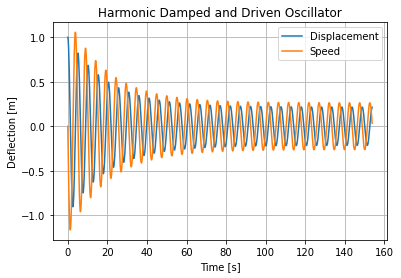

In [23]:
ax = plt.subplot(111)                       # for the legend
ax.plot(T, Y[0, :], label='Displacement')   # plot position against time
ax.plot(T, Y[1, :], label='Speed')          # plot speed against time

plt.title('Harmonic Damped and Driven Oscillator')
plt.xlabel('Time [s]')
plt.ylabel('Deflection [m]')

ax.legend()

plt.grid(True)
plt.show()                                  # display plot